# **Configuration**




In [ ]:
# Installation des librairies

!pip install langdetect
!pip install contractions
!pip install tweet-preprocessor
!pip install spacy-sentence-bert
!pip install nlputils


     |████████████████████████████████| 981 kB 8.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=310020388f87d124cfc5b200fcc7cc2bec0f3fe2f2f67e9bf0c2408520d2412c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 287 kB 6.8 MB/s 
     |████████████████████████████████| 106 kB 42.1 MB/s 
     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████| 6.2 MB 39.8 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 26.2 MB/s 
     |████████████████████████████████| 457 kB 35.3 MB/s 
     |████████████████████████████████| 660 kB 40.9 MB/s 
     |████████████████████████████████| 10.1 MB 9.4 MB/s 
     |████████████████████████████████| 58 kB 4.5 MB/s 
     |████████████████████████████████| 4.2 MB 9.1 MB/s 
     |███████████

In [ ]:
# Importation des différentes librairies utiles pour le notebook

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pickle 
import pandas as pd
import spacy
from scipy.stats import randint
from scipy import spatial
import numpy as np
import string as st
import time
import base64
import re
import sys
import contractions
import nltk
import os
import gensim
from sklearn.metrics.pairwise import cosine_similarity


# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## detection de language
import langdetect 

import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import RegexpParser
from nltk import pos_tag
from nltk.corpus import stopwords
nltk.download('all')

from spacy.tokens import Span
# il faut sélectionner pour quelle langue les traitements vont être faits.
#nlp = spacy.load('en')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# fonctions utilities (affichage, confusion, etc.)
# https://pypi.org/project/nlputils/

from nlputils import *


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

my_local_drive='/content/gdrive/My Drive/Colab Notebooks/TER - Machine Learning'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

Mounted at /content/gdrive/
/content/gdrive/My Drive/Colab Notebooks/TER - Machine Learning


'/content/gdrive/My Drive/Colab Notebooks/TER - Machine Learning'

# Données de reference

## **2.1 Claim_Mapping : Cosine Similarity with BERT_Model**

In [ ]:
data = pd.read_excel('Dataset/claim_mappings_gold.xlsx')
train = pd.DataFrame(data, columns= ['Text Fragments A','Text Fragments B','Annotations','Score'])

print(len(train.index))
train.head()

584


,Text Fragments A,Text Fragments B,Annotations,Score
0,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,E,1.060032
1,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,E,1.035284
2,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,E,1.031731
3,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,E*,1.015787
4,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...",ST,1.015759


In [ ]:
import spacy_sentence_bert
import pandas as pd
nlp = spacy_sentence_bert.load_model('en_stsb_roberta_large')
data = pd.read_excel('Dataset/claim_mappings_gold.xlsx')
train = pd.DataFrame(data, columns= ['Text Fragments A','Text Fragments B','Annotations','Score'])
similarityValue = []

for i in range(train.count()[0]):
    sentence_1 = nlp(train.iloc[i][0])
    sentence_2 = nlp(train.iloc[i][1])
    similarityValue.append(sentence_1.similarity(sentence_2))
    print(sentence_1, '|', sentence_2, '|', sentence_1.similarity(sentence_2))

train['BERT_Sim'] = similarityValue
print(train)

Milwaukee County Executive Chris Abele says county buses are no less safe now than a year or two ago | Milwaukee County Executive Chris Abele says county buses are no less safe now than a year or two ago | 1.0
Milwaukee County executive candidate Chris Abele says opponent Jeff Stone = Scott Walker | Milwaukee County executive candidate Chris Abele says opponent Jeff Stone = Scott Walker | 1.0
Tom Barrett says gubernatorial rival Scott Walker eliminated economic development office during recession | Tom Barrett says gubernatorial rival Scott Walker eliminated economic development office during recession | 1.0
Mitt Romney says Barack Obama 'could have gotten crippling sanctions against Iran. He did not.' | Paul Ryan says the Obama administration ‘watered down sanctions’ against Iran | 0.6388582328441985
Newt Gingrich says Freddie Mac, electric co-ops and credit unions are similar organizations | Gingrich repeats claim that Freddie Mac, credit unions are ‘government-sponsored enterprises’

In [ ]:
train.head()

,Text Fragments A,Text Fragments B,Annotations,Score,BERT_Sim
0,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,E,1.060032,1.000000
1,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,E,1.035284,1.000000
2,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,E,1.031731,1.000000
3,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,E*,1.015787,0.638858
4,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...",ST,1.015759,0.725755


## **2.2 Claim_Mapping : Cosine Similarity with Countvectorizer**

In [ ]:
def cosine_distance_countvectorizer_method(s1, s2):
    
   
    sentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(sentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    #print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return 1-cosine

In [ ]:
CosineSim = []

for i in range(train.count()[0]):
  text1 = str(train.loc[i][0])
  text2 = str(train.loc[i][1])

  # v1 = text_to_vector_countVec(text1)
  # v2 = text_to_vector_countVec(text2)

  cosine = cosine_distance_countvectorizer_method(text1, text2)
  CosineSim.append(cosine)

train['CountVect_Cosine_sim'] = CosineSim

In [ ]:
train.head()

,Text Fragments A,Text Fragments B,Annotations,Score,BERT_Sim,CountVect_Cosine_sim
0,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,E,1.060032,1.000000,1.000000
1,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,E,1.035284,1.000000,1.000000
2,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,E,1.031731,1.000000,1.000000
3,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,E*,1.015787,0.638858,0.389249
4,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...",ST,1.015759,0.725755,0.462910


## **2.3 Claim_Mapping : Cosine Similarity with Tf_Idf_Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
def cosine_distance_TFIDF_Vectorizer_method(s1, s2):
    
   
    sentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import TfidfVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = TfidfVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(sentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    #print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return 1-cosine

In [ ]:
Cos = []

for i in range(train.count()[0]):
  text1 = str(train.loc[i][0])
  text2 = str(train.loc[i][1])

  # v1 = text_to_vector_countVec(text1)
  # v2 = text_to_vector_countVec(text2)

  cosine = cosine_distance_TFIDF_Vectorizer_method(text1, text2)
  Cos.append(cosine)

train['TfIdfVect_Cosine_sim'] = Cos

In [ ]:
train.head()

,Text Fragments A,Text Fragments B,Annotations,Score,BERT_Sim,CountVect_Cosine_sim,TfIdfVect_Cosine_sim
0,Milwaukee County Executive Chris Abele says co...,Milwaukee County Executive Chris Abele says co...,E,1.060032,1.000000,1.000000,1.000000
1,Milwaukee County executive candidate Chris Abe...,Milwaukee County executive candidate Chris Abe...,E,1.035284,1.000000,1.000000,1.000000
2,Tom Barrett says gubernatorial rival Scott Wal...,Tom Barrett says gubernatorial rival Scott Wal...,E,1.031731,1.000000,1.000000,1.000000
3,Mitt Romney says Barack Obama 'could have gott...,Paul Ryan says the Obama administration ‘water...,E*,1.015787,0.638858,0.389249,0.244809
4,"Newt Gingrich says Freddie Mac, electric co-op...","Gingrich repeats claim that Freddie Mac, credi...",ST,1.015759,0.725755,0.462910,0.304126


In [ ]:
#Export the results to a csv file

# df = df.dropna(subset=['clean_text'])
train.to_csv('Dataset/Score-Similarite.csv', columns=['Text Fragments A', 'Text Fragments B', 'Annotations', 'Score', 'BERT_Sim', 'CountVect_Cosine_sim', 'TfIdfVect_Cosine_sim'], index=False)

## **2.4 Claim_Mapping : Evaluation**

In [ ]:
data = pd.read_csv('Dataset/Score-Similarite.csv')

# data = pd.read_excel('Dataset/Similarity_score.xlsx')
train = pd.DataFrame(data)

print(len(train.index))
scores=train.copy()

584


In [ ]:
train.describe()

,Score,BERT_Sim,CountVect_Cosine_sim,TfIdfVect_Cosine_sim
count,584.000000,584.000000,584.000000,584.000000
mean,0.634433,0.486428,0.337127,0.226567
std,0.082577,0.196493,0.197746,0.180649
min,0.550046,0.003826,0.000000,0.000000
25%,0.573984,0.351029,0.201947,0.115265
50%,0.611049,0.467099,0.299071,0.178424
75%,0.669047,0.609839,0.433013,0.279828
max,1.060032,1.000000,1.000000,1.000000


In [ ]:
Count_vec=train['CountVect_Cosine_sim']
TFIDF=train['TfIdfVect_Cosine_sim']
BERT=train['BERT_Sim']
labels=train['Annotations']

In [ ]:
n=100
seuiltab = np.linspace(0,1,100)
resCount_vec=np.zeros(n)
resTFIDF=np.zeros(n)
resBERT=np.zeros(n)
def test(score,label,seuil):
  res=0
  for i in range(len(label)):
    if ((score[i]>=seuil) and ((label[i]=='E') or (label[i]=='E*') or(label[i]=='ST'))):
      res=res+1
    if ((score[i]<seuil) and ((label[i]!='E') and (label[i]!='E*') and(label[i]=='ST'))):
      res =res +1
  return res/len(label) 
for i in range(n):
  resCount_vec[i]=test(Count_vec,labels,seuiltab[i])
  resTFIDF[i]=test(TFIDF,labels,seuiltab[i])
  resBERT[i]=test(BERT,labels,seuiltab[i])

Max pour cosinus avec CountVectorizer :  0.54 %
Min pour cosinus avec CountVectorizer :  0.36 %
Moyenne pour cosinus avec CountVectorizer :  0.44 %
Ecart-type pour cosinus avec CountVectorizer :  0.07 %

Max pour cosinus avec BERT :  0.54 %
Min pour cosinus avec BERT :  0.36 %
Moyenne pour cosinus avec BERT :  0.48 %
Ecart-type pour cosinus avec BERT :  0.07 %

Max pour cosinus avec TFIDF :  0.54 %
Min pour cosinus avec TFIDF :  0.36 %
Moyenne pour cosinus avec TFIDF :  0.42 %
Ecart-type pour cosinus avec TFIDF :  0.07 %


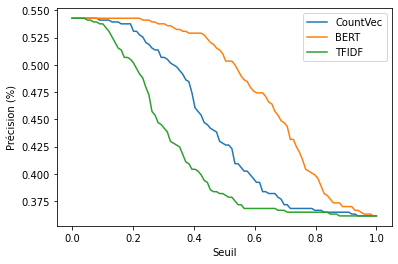

In [ ]:
plt.plot(seuiltab,resCount_vec,label="CountVec")
plt.plot(seuiltab,resBERT,label="BERT")
plt.plot(seuiltab,resTFIDF,label="TFIDF")
plt.xlabel("Seuil")
plt.ylabel("Précision (%)")

print("Max pour cosinus avec CountVectorizer : ",round(resCount_vec.max(),2),"%")
print("Min pour cosinus avec CountVectorizer : ",round(resCount_vec.min(),2),"%")
print("Moyenne pour cosinus avec CountVectorizer : ",round(np.average(resCount_vec),2),"%")
print("Ecart-type pour cosinus avec CountVectorizer : ",round(np.std(resCount_vec),2),"%")

print("\nMax pour cosinus avec BERT : ",round(resBERT.max(),2),"%")
print("Min pour cosinus avec BERT : ",round(resBERT.min(),2),"%")
print("Moyenne pour cosinus avec BERT : ",round(np.average(resBERT),2),"%")
print("Ecart-type pour cosinus avec BERT : ",round(np.std(resBERT),2),"%")

print("\nMax pour cosinus avec TFIDF : ",round(resTFIDF.max(),2),"%")
print("Min pour cosinus avec TFIDF : ",round(resTFIDF.min(),2),"%")
print("Moyenne pour cosinus avec TFIDF : ",round(np.average(resTFIDF),2),"%")
print("Ecart-type pour cosinus avec TFIDF : ",round(np.std(resTFIDF),2),"%")


plt.legend()
plt.show()

In [ ]:
n=100
seuiltab = np.linspace(0,1,100)
resCount_vec=np.zeros(n)
resTFIDF=np.zeros(n)
resBERT=np.zeros(n)
def test(score,label,seuil):
  res=0
  for i in range(len(label)):
    if ((score[i]>=seuil) and ((label[i]=='E') or (label[i]=='E*'))):
      res=res+1
    if ((score[i]<seuil) and ((label[i]!='E') and (label[i]!='E*'))):
      res =res +1
  return res/len(label) 
for i in range(n):
  resCount_vec[i]=test(Count_vec,labels,seuiltab[i])
  resTFIDF[i]=test(TFIDF,labels,seuiltab[i])
  resBERT[i]=test(BERT,labels,seuiltab[i])


Max pour cosinus avec CountVectorizer :  0.82 %
Min pour cosinus avec CountVectorizer :  0.2 %
Moyenne pour cosinus avec CountVectorizer :  0.66 %
Ecart-type pour cosinus avec CountVectorizer :  0.21 %

Max pour cosinus avec BERT :  0.86 %
Min pour cosinus avec BERT :  0.2 %
Moyenne pour cosinus avec BERT :  0.59 %
Ecart-type pour cosinus avec BERT :  0.26 %

Max pour cosinus avec TFIDF :  0.82 %
Min pour cosinus avec TFIDF :  0.2 %
Moyenne pour cosinus avec TFIDF :  0.72 %
Ecart-type pour cosinus avec TFIDF :  0.18 %


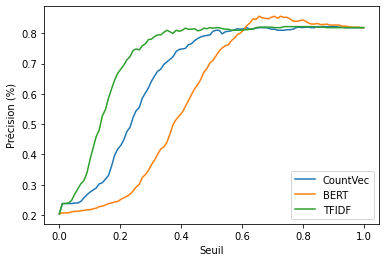

In [ ]:
plt.plot(seuiltab,resCount_vec,label="CountVec")
plt.plot(seuiltab,resBERT,label="BERT")
plt.plot(seuiltab,resTFIDF,label="TFIDF")
plt.xlabel("Seuil")
plt.ylabel("Précision (%)")

print("Max pour cosinus avec CountVectorizer : ",round(resCount_vec.max(),2),"%")
print("Min pour cosinus avec CountVectorizer : ",round(resCount_vec.min(),2),"%")
print("Moyenne pour cosinus avec CountVectorizer : ",round(np.average(resCount_vec),2),"%")
print("Ecart-type pour cosinus avec CountVectorizer : ",round(np.std(resCount_vec),2),"%")

print("\nMax pour cosinus avec BERT : ",round(resBERT.max(),2),"%")
print("Min pour cosinus avec BERT : ",round(resBERT.min(),2),"%")
print("Moyenne pour cosinus avec BERT : ",round(np.average(resBERT),2),"%")
print("Ecart-type pour cosinus avec BERT : ",round(np.std(resBERT),2),"%")

print("\nMax pour cosinus avec TFIDF : ",round(resTFIDF.max(),2),"%")
print("Min pour cosinus avec TFIDF : ",round(resTFIDF.min(),2),"%")
print("Moyenne pour cosinus avec TFIDF : ",round(np.average(resTFIDF),2),"%")
print("Ecart-type pour cosinus avec TFIDF : ",round(np.std(resTFIDF),2),"%")


plt.legend()
plt.show()

In [ ]:
def precision(VP,FP):
  return(VP/(VP+FP))
def rappel(VP,FN):
  return(VP/(VP+FN))
def fscore(VP,FP,FN):
  return(VP/(VP+(FP+FN)/2))
def seeresult(x,ylabel,seuil=60.5,ylegende="Précision (%)",xlegende="Seuil",titre="Évolution de la précision en fonction du seuil (Score-Cosinus)"):
  largeur = 0.5
  plt.bar(x,ylabel,largeur)
  plt.scatter([i for i in x],ylabel+largeur/2.0,color='k',s=10)
  plt.title(titre)
  plt.xlabel(xlegende)
  plt.ylabel(ylegende)
  plt.xlim(x.min(),x.max())
  plt.ylim(ylabel.min(),ylabel.max())
  plt.show()
  print("Max : ",round(ylabel.max(),2),"%")
  print("Min : ",round(ylabel.min(),2),"%")
  print("Moyene : ",round(np.average(ylabel),2),"%")
  print("Écart-type : ",round(np.std(ylabel),2),"%")
  

In [ ]:
n=100
seuiltab = np.linspace(0,1,100)

def test(score,label,seuil):
  VP,FP,VN,FN=0,0,0,0
  for i in range(len(label)):
    if ((score[i]>=seuil)and((label[i]=="E")or(label[i]=="E*")or(label[i]=="ST"))):
      VP+=1
    elif((score[i]>=seuil)and((label[i]!="E")and(label[i]!="E*")and(label[i]!="ST"))):
      FP+=1
    if((score[i]<seuil)and((label[i]!="E")and(label[i]!="E*")and(label[i]!="ST"))):
      VN+=1
    elif ((score[i]<seuil)and((label[i]=="E")or(label[i]=="E*")or(label[i]=="ST"))):
      FN+=1
  return (VP,FP,VN,FN)

In [ ]:
n=100
precision_tab=np.zeros(n)
rappel_tab=np.zeros(n)
fscore_tab=np.zeros(n)
for i in range(n):
  VP,FP,VN,FN=test(Count_vec, labels, seuiltab[i])
  precision_tab[i]=precision(VP,FP)
  rappel_tab[i]=rappel(VP,FN)
  fscore_tab[i]=fscore(VP,FP,FN)

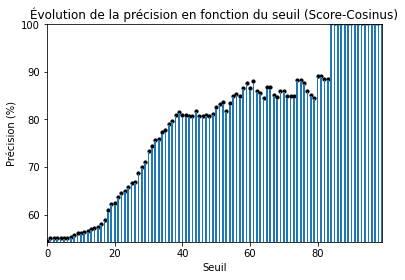

Max :  100.0 %
Min :  54.28 %
Moyene :  78.81 %
Écart-type :  14.42 %


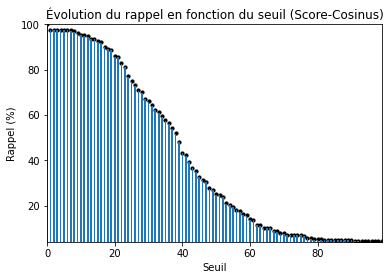

Max :  100.0 %
Min :  4.1 %
Moyene :  40.49 %
Écart-type :  35.74 %


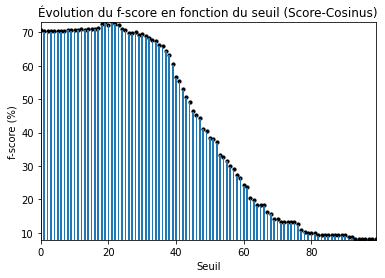

Max :  72.99 %
Min :  7.88 %
Moyene :  40.63 %
Écart-type :  26.27 %


In [ ]:
xtab = np.array(range(n))
xtab = [i + 1 for i in xtab]
seeresult(np.array(range(n)),precision_tab*100,seuil=63,)
seeresult(np.array(range(n)),rappel_tab*100,seuil=65,ylegende="Rappel (%)",titre="Évolution du rappel en fonction du seuil (Score-Cosinus)")
seeresult(np.array(range(n)),fscore_tab*100,seuil=65,ylegende="f-score (%)",titre="Évolution du f-score en fonction du seuil (Score-Cosinus)")

In [ ]:
n=100
precision_tab=np.zeros(n)
rappel_tab=np.zeros(n)
fscore_tab=np.zeros(n)
for i in range(n):
  VP,FP,VN,FN=test(BERT, labels, seuiltab[i])
  precision_tab[i]=precision(VP,FP)
  rappel_tab[i]=rappel(VP,FN)
  fscore_tab[i]=fscore(VP,FP,FN)

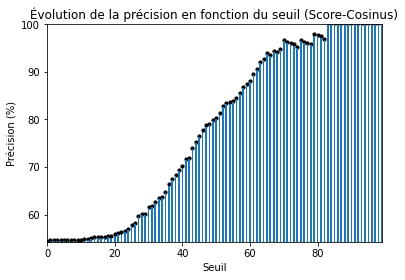

Max :  100.0 %
Min :  54.28 %
Moyene :  77.8 %
Écart-type :  17.93 %


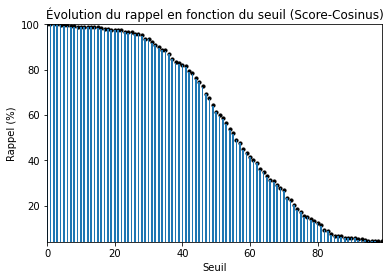

Max :  100.0 %
Min :  4.1 %
Moyene :  57.41 %
Écart-type :  36.87 %


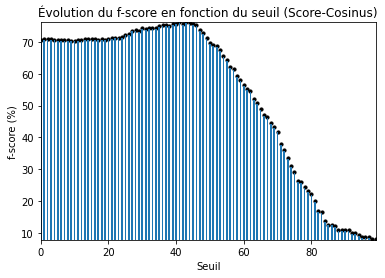

Max :  76.11 %
Min :  7.88 %
Moyene :  53.01 %
Écart-type :  24.52 %


In [ ]:
xtab = np.array(range(n))
xtab = [i + 1 for i in xtab]
seeresult(np.array(range(n)),precision_tab*100,seuil=63,)
seeresult(np.array(range(n)),rappel_tab*100,seuil=65,ylegende="Rappel (%)",titre="Évolution du rappel en fonction du seuil (Score-Cosinus)")
seeresult(np.array(range(n)),fscore_tab*100,seuil=65,ylegende="f-score (%)",titre="Évolution du f-score en fonction du seuil (Score-Cosinus)")

In [ ]:
n=100
precision_tab=np.zeros(n)
rappel_tab=np.zeros(n)
fscore_tab=np.zeros(n)
for i in range(n):
  VP,FP,VN,FN=test(TFIDF, labels, seuiltab[i])
  precision_tab[i]=precision(VP,FP)
  rappel_tab[i]=rappel(VP,FN)
  fscore_tab[i]=fscore(VP,FP,FN)

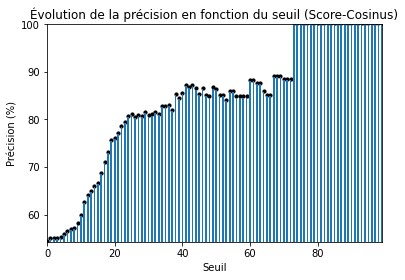

Max :  100.0 %
Min :  54.28 %
Moyene :  83.93 %
Écart-type :  13.61 %


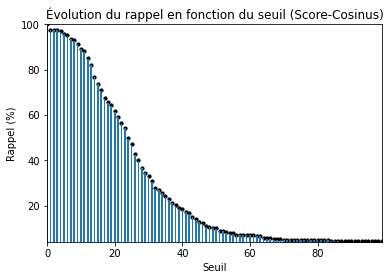

Max :  100.0 %
Min :  4.1 %
Moyene :  28.55 %
Écart-type :  32.06 %


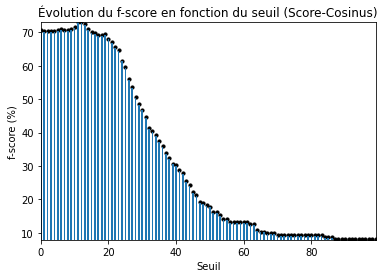

Max :  73.04 %
Min :  7.88 %
Moyene :  31.26 %
Écart-type :  25.16 %


In [ ]:
xtab = np.array(range(n))
xtab = [i + 1 for i in xtab]
seeresult(np.array(range(n)),precision_tab*100,seuil=63,)
seeresult(np.array(range(n)),rappel_tab*100,seuil=65,ylegende="Rappel (%)",titre="Évolution du rappel en fonction du seuil (Score-Cosinus)")
seeresult(np.array(range(n)),fscore_tab*100,seuil=65,ylegende="f-score (%)",titre="Évolution du f-score en fonction du seuil (Score-Cosinus)")

# Données ClaimsKG

## **1. Preprocessing**




In [ ]:
df2 = pd.read_csv('Dataset/ClaimsKG_Result.csv')
df = df2.copy()
df = df.drop(columns =['id','date','ratingName','author','source','sourceURL','link','language'])

df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances"
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care"
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News"


In [ ]:
df.shape

(10000, 6)

In [ ]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
df['removed_punc'] = df['text'].apply(lambda x: remove_punct(x))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...


In [ ]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
df['tokens'] = df['removed_punc'].apply(lambda msg : tokenize(msg))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re..."
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ..."
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o..."
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ..."
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star..."


In [ ]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
df['larger_tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens,larger_tokens
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re...","[malia, obama, cashed, million, refund, check]"
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ...","[high, diver, saved, from, jumping, into, drai..."
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o...","[revenue, generated, drilling, virginia’s, coa..."
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ...","[health, insurance, companies, ceos, million, ..."
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star...","[cruz, said, that, veterans, should, start, se..."


In [ ]:
''' Remove stopwords. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [ ]:
df['clean_tokens'] = df['larger_tokens'].apply(lambda x : remove_stopwords(x))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens,larger_tokens,clean_tokens
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re...","[malia, obama, cashed, million, refund, check]","[malia, obama, cashed, million, refund, check]"
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ...","[high, diver, saved, from, jumping, into, drai...","[high, diver, saved, jumping, drained, pool, c..."
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o...","[revenue, generated, drilling, virginia’s, coa...","[revenue, generated, drilling, virginia’s, coa..."
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ...","[health, insurance, companies, ceos, million, ...","[health, insurance, companies, ceos, million, ..."
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star...","[cruz, said, that, veterans, should, start, se...","[cruz, said, veterans, start, selling, cookies..."


In [ ]:
# Apply stemming to get root words 
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [ ]:
df['stem_words'] = df['clean_tokens'].apply(lambda wrd: stemming(wrd))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re...","[malia, obama, cashed, million, refund, check]","[malia, obama, cashed, million, refund, check]","[malia, obama, cash, million, refund, check]"
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ...","[high, diver, saved, from, jumping, into, drai...","[high, diver, saved, jumping, drained, pool, c...","[high, diver, save, jump, drain, pool, cast, c..."
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o...","[revenue, generated, drilling, virginia’s, coa...","[revenue, generated, drilling, virginia’s, coa...","[revenu, gener, drill, virginia’, coast, milli..."
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ...","[health, insurance, companies, ceos, million, ...","[health, insurance, companies, ceos, million, ...","[health, insur, compani, ceo, million, year]"
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star...","[cruz, said, that, veterans, should, start, se...","[cruz, said, veterans, start, selling, cookies...","[cruz, said, veteran, start, sell, cooki, orde..."


In [ ]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [ ]:
df['lemma_words'] = df['clean_tokens'].apply(lambda x : lemmatize(x))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re...","[malia, obama, cashed, million, refund, check]","[malia, obama, cashed, million, refund, check]","[malia, obama, cash, million, refund, check]","[malia, obama, cashed, million, refund, check]"
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ...","[high, diver, saved, from, jumping, into, drai...","[high, diver, saved, jumping, drained, pool, c...","[high, diver, save, jump, drain, pool, cast, c...","[high, diver, saved, jumping, drained, pool, c..."
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o...","[revenue, generated, drilling, virginia’s, coa...","[revenue, generated, drilling, virginia’s, coa...","[revenu, gener, drill, virginia’, coast, milli...","[revenue, generated, drilling, virginia’s, coa..."
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ...","[health, insurance, companies, ceos, million, ...","[health, insurance, companies, ceos, million, ...","[health, insur, compani, ceo, million, year]","[health, insurance, company, ceo, million, year]"
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star...","[cruz, said, that, veterans, should, start, se...","[cruz, said, veterans, start, selling, cookies...","[cruz, said, veteran, start, sell, cooki, orde...","[cruz, said, veteran, start, selling, cooky, o..."


In [ ]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
df['clean_text_claim'] = df['lemma_words'].apply(lambda x : return_sentences(x))
df.head()

,text,truthRating,headline,named_entities_claim,named_entities_article,keywords,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text_claim
0,Malia Obama cashed a $1.2 million tax refund c...,-1,Did Malia Obama Cash a $1.2 Million Check?,"Facebook,Fan Fiction,Junk News,Malia Obama,Sno...",Malia Obama,NaN,Malia Obama cashed a 12 million tax refund check,"[malia, obama, cashed, a, 12, million, tax, re...","[malia, obama, cashed, million, refund, check]","[malia, obama, cashed, million, refund, check]","[malia, obama, cash, million, refund, check]","[malia, obama, cashed, million, refund, check]",malia obama cashed million refund check
1,High diver is saved from jumping into a draine...,-1,High Diver Saved By Cross,"Cincinnati Post,Islam,Scripture lesson,Univers...",shadow on the wall,ASP Article,High diver is saved from jumping into a draine...,"[high, diver, is, saved, from, jumping, into, ...","[high, diver, saved, from, jumping, into, drai...","[high, diver, saved, jumping, drained, pool, c...","[high, diver, save, jump, drain, pool, cast, c...","[high, diver, saved, jumping, drained, pool, c...",high diver saved jumping drained pool cast cro...
2,'And the revenue generated by drilling off Vir...,2,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",And the revenue generated by drilling off Virg...,"[and, the, revenue, generated, by, drilling, o...","[revenue, generated, drilling, virginia’s, coa...","[revenue, generated, drilling, virginia’s, coa...","[revenu, gener, drill, virginia’, coast, milli...","[revenue, generated, drilling, virginia’s, coa...",revenue generated drilling virginia’s coast mi...
3,Health insurance companies pay CEOs $24 millio...,2,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",Health insurance companies pay CEOs 24 million...,"[health, insurance, companies, pay, ceos, 24, ...","[health, insurance, companies, ceos, million, ...","[health, insurance, companies, ceos, million, ...","[health, insur, compani, ceo, million, year]","[health, insurance, company, ceo, million, year]",health insurance company ceo million year
4,Ted Cruz said that veterans should start selli...,1,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",Ted Cruz said that veterans should start selli...,"[ted, cruz, said, that, veterans, should, star...","[cruz, said, that, veterans, should, start, se...","[cruz, said, veterans, start, selling, cookies...","[cruz, said, veteran, start, sell, cooki, orde...","[cruz, said, veteran, start, selling, cooky, o...",cruz said veteran start selling cooky order ra...


In [ ]:
# Write cleaned texts to CSV file.

df = df.dropna(subset=['clean_text_claim'])
df.to_csv('Dataset/ClaimsKG_Clean_Test.csv', columns=['clean_text_claim'], index=False)

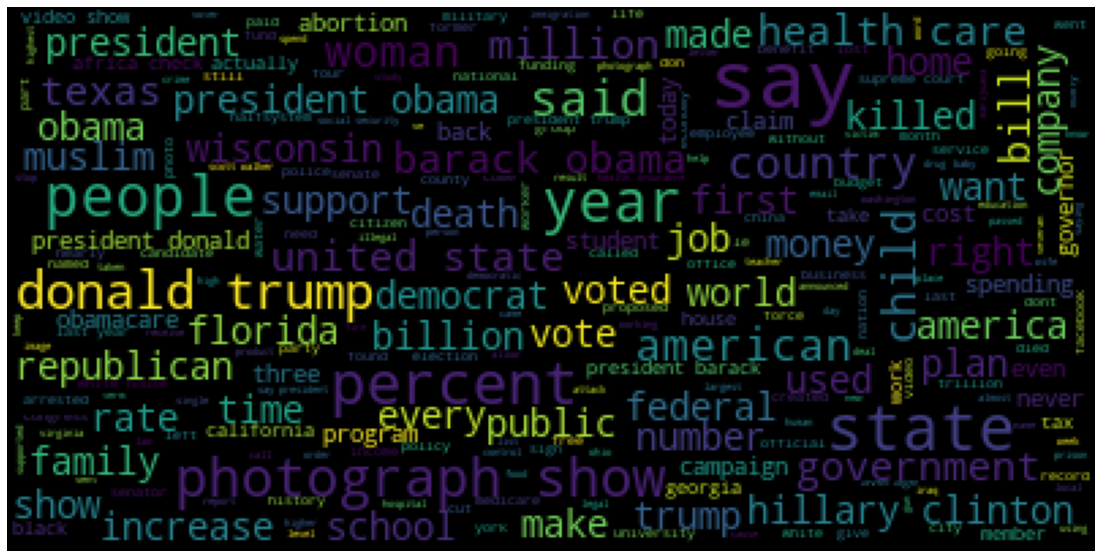

In [ ]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in df['clean_text_claim']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Données TweetsCov19

## **1. Preprocessing**

In [ ]:
columns=["id","text"]
tweets=pd.read_csv('Dataset/tweets-train-dev.tsv', sep='\t',names=columns) ## On ajoute l'option pour supprimer les mauvaises lignes
tweets.head()

,id,text
0,tweet-sno-0,How are butterflies surviving the #AustralianF...
1,tweet-sno-1,Trump needs to immediately divest from his bus...
2,tweet-sno-2,A number of fraudulent text messages informing...
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...


In [ ]:
tweets.shape

(1196, 2)

In [ ]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
tweets['removed_punc'] = tweets['text'].apply(lambda x: remove_punct(x))
tweets.head()

,id,text,removed_punc
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...


In [ ]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
tweets['tokens'] = tweets['removed_punc'].apply(lambda msg : tokenize(msg))
tweets.head()

,id,text,removed_punc,tokens
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra..."
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ..."
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in..."
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti..."
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught..."


In [ ]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
tweets['larger_tokens'] = tweets['tokens'].apply(lambda x : remove_small_words(x))
tweets.head()

,id,text,removed_punc,tokens,larger_tokens
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra...","[butterflies, surviving, australianfires, juli..."
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ...","[trump, needs, immediately, divest, from, busi..."
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in...","[number, fraudulent, text, messages, informing..."
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti...","[fact, check, army, contacting, anyone, regard..."
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught...","[drone, attack, soleimani, caught, camerairanu..."


In [ ]:
''' Remove stopwords. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [ ]:
tweets['clean_tokens'] = tweets['larger_tokens'].apply(lambda x : remove_stopwords(x))
tweets.head()

,id,text,removed_punc,tokens,larger_tokens,clean_tokens
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra...","[butterflies, surviving, australianfires, juli...","[butterflies, surviving, australianfires, juli..."
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ...","[trump, needs, immediately, divest, from, busi...","[trump, needs, immediately, divest, businesses..."
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in...","[number, fraudulent, text, messages, informing...","[number, fraudulent, text, messages, informing..."
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti...","[fact, check, army, contacting, anyone, regard...","[fact, check, army, contacting, anyone, regard..."
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu..."


In [ ]:
# Apply stemming to get root words 
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [ ]:
tweets['stem_words'] = tweets['clean_tokens'].apply(lambda wrd: stemming(wrd))
tweets.head()

,id,text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra...","[butterflies, surviving, australianfires, juli...","[butterflies, surviving, australianfires, juli...","[butterfli, surviv, australianfir, juli, favel..."
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ...","[trump, needs, immediately, divest, from, busi...","[trump, needs, immediately, divest, businesses...","[trump, need, immedi, divest, busi, compli, em..."
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in...","[number, fraudulent, text, messages, informing...","[number, fraudulent, text, messages, informing...","[number, fraudul, text, messag, inform, indivi..."
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti...","[fact, check, army, contacting, anyone, regard...","[fact, check, army, contacting, anyone, regard...","[fact, check, armi, contact, anyon, regard, dr..."
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu..."


In [ ]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [ ]:
tweets['lemma_words'] = tweets['clean_tokens'].apply(lambda x : lemmatize(x))
tweets.head()

,id,text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra...","[butterflies, surviving, australianfires, juli...","[butterflies, surviving, australianfires, juli...","[butterfli, surviv, australianfir, juli, favel...","[butterfly, surviving, australianfires, julie,..."
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ...","[trump, needs, immediately, divest, from, busi...","[trump, needs, immediately, divest, businesses...","[trump, need, immedi, divest, busi, compli, em...","[trump, need, immediately, divest, business, c..."
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in...","[number, fraudulent, text, messages, informing...","[number, fraudulent, text, messages, informing...","[number, fraudul, text, messag, inform, indivi...","[number, fraudulent, text, message, informing,..."
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti...","[fact, check, army, contacting, anyone, regard...","[fact, check, army, contacting, anyone, regard...","[fact, check, armi, contact, anyon, regard, dr...","[fact, check, army, contacting, anyone, regard..."
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu..."


In [ ]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
tweets['clean_text_tweet'] = tweets['lemma_words'].apply(lambda x : return_sentences(x))
tweets.head()

,id,text,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text_tweet
0,tweet-sno-0,How are butterflies surviving the #AustralianF...,How are butterflies surviving the AustralianFi...,"[how, are, butterflies, surviving, the, austra...","[butterflies, surviving, australianfires, juli...","[butterflies, surviving, australianfires, juli...","[butterfli, surviv, australianfir, juli, favel...","[butterfly, surviving, australianfires, julie,...",butterfly surviving australianfires julie fave...
1,tweet-sno-1,Trump needs to immediately divest from his bus...,Trump needs to immediately divest from his bus...,"[trump, needs, to, immediately, divest, from, ...","[trump, needs, immediately, divest, from, busi...","[trump, needs, immediately, divest, businesses...","[trump, need, immedi, divest, busi, compli, em...","[trump, need, immediately, divest, business, c...",trump need immediately divest business comply ...
2,tweet-sno-2,A number of fraudulent text messages informing...,A number of fraudulent text messages informing...,"[a, number, of, fraudulent, text, messages, in...","[number, fraudulent, text, messages, informing...","[number, fraudulent, text, messages, informing...","[number, fraudul, text, messag, inform, indivi...","[number, fraudulent, text, message, informing,...",number fraudulent text message informing indiv...
3,tweet-sno-3,Fact check: The U.S. Army is NOT contacting an...,Fact check The US Army is NOT contacting anyon...,"[fact, check, the, us, army, is, not, contacti...","[fact, check, army, contacting, anyone, regard...","[fact, check, army, contacting, anyone, regard...","[fact, check, armi, contact, anyon, regard, dr...","[fact, check, army, contacting, anyone, regard...",fact check army contacting anyone regarding dr...
4,tweet-sno-4,The US drone attack on #Soleimani caught on ca...,The US drone attack on Soleimani caught on cam...,"[the, us, drone, attack, on, soleimani, caught...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...","[drone, attack, soleimani, caught, camerairanu...",drone attack soleimani caught camerairanusapic...


In [ ]:
# Write cleaned texts to CSV file.

tweets = tweets.dropna(subset=['clean_text_tweet'])
tweets.to_csv('Dataset/Tweets_Clean_Test.csv', columns=['clean_text_tweet'], index=False)

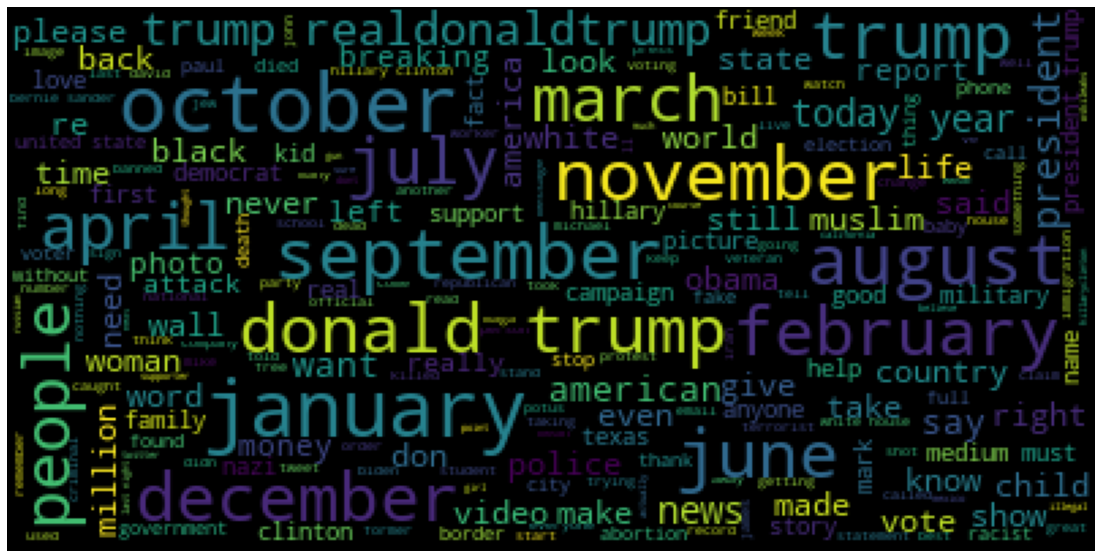

In [ ]:
# Generate a basic word cloud 
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in tweets['clean_text_tweet']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()